# Machine Learning Model Development


## 1 - Exploratory Data Analysis (EDA)


### Importing important libraries

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from collections import Counter
%matplotlib inline

### Importing the CSV file

After importing all the important libraries, the first step is to import the dataset to work on.

In [2]:
birds = pd.read_csv('birdbones/bird.csv')  # Read CSV file

### Data observation by EDA

The data set is observed and exploratory data analysis is performed to get important information like distribution and imbalance in the data, and correlation bettween features.

In [3]:
np.shape(birds) #Checking the shape of birds data

(420, 12)

In [4]:
birds.head() #tabular representation of first five rows

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


The cell below will remove all the rows that have NA values in the dataset, because these rows are of no use to us in anyway. Also there are only 7 such rows so it does not effect the dataset as much.  

In [5]:
birds=birds.dropna(axis=0, how="any") #Removing the NA values
birds=birds.drop(['id'],axis=1)       #Removing id column as it is not important

In [6]:
np.shape(birds) # verify the new shape of data. Removed 7 columns.

(413, 11)

In [7]:
type(birds.type[1]) 
#Confirming the data types as seen in above table. probably need to do label encoding.

str

The above cell shows that the types of birds in the dataset are in string format. Best appoach is to change these into numerical labels. We would be using Label Encoding to do this.

In [8]:
type(birds.huml[1]) #Confirming the data types as seen in above table.

numpy.float64

The below cell shows all the important statistical information ofthe dataset. Important thing to notice is the mean values of the bone measues, and the standard deviations. These suggest that we should consider standardiziation of this dataset.(Will be discussed in preprocessing)

In [9]:
birds.describe() #Important stats observation of the data.

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,64.874867,4.381235,69.197409,3.606538,36.822446,3.221768,64.615642,3.182324,39.309806,2.944891
std,54.056078,2.861460,58.929490,2.190150,19.899356,2.021169,37.977929,2.084124,23.272704,2.194744
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.360000,2.200000,28.160000,1.870000,21.350000,1.720000,36.350000,1.560000,23.050000,1.430000
50%,44.180000,3.500000,43.710000,2.960000,31.090000,2.520000,51.880000,2.490000,31.740000,2.240000
75%,90.490000,5.820000,97.520000,4.770000,47.090000,4.110000,82.870000,4.250000,50.440000,3.520000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


### Pie chart - percentage of each class of birds in the dataset

The pie chart below shows the distribution of dataset with respect to the types of the birds. This shows clear imbalance in the dataset as two of the classes make around 58% of data while other four, the remaining 42%.

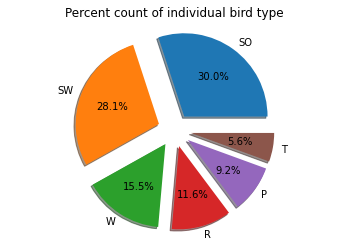

In [10]:
# Graphically represent the ecological bird types as a pie chart:
label=['SO','SW','W','R','P','T']
expld = 0.2*np.ones(6)
plt.pie(birds['type'].value_counts(), labels=label, explode=expld, shadow=True, autopct='%1.1f%%')
plt.title('Percent count of individual bird type')
plt.axis('equal')
plt.show()

In [11]:
columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']
# The features of the birds bones

### Box plot - Relation of each bone measure with respect to each bird class

Another thing to observe is the trend of each bone measurement among different ecological classes of the birds to check if they are related to these measurements. This can be done by creating box plots between each bone measurement against each bird type. The results are interesting as they clearly show that the difference among the classes is very similar across the different bone measurements. The scansorial, singing and terrestrial birds have very small length and width of bones while the other three categories, raptors, swimming, and wading birds, have higher measure of bone length and width with greater variance. These results show high correlation between bone measurements and hence suggest classification method to solve this problem.

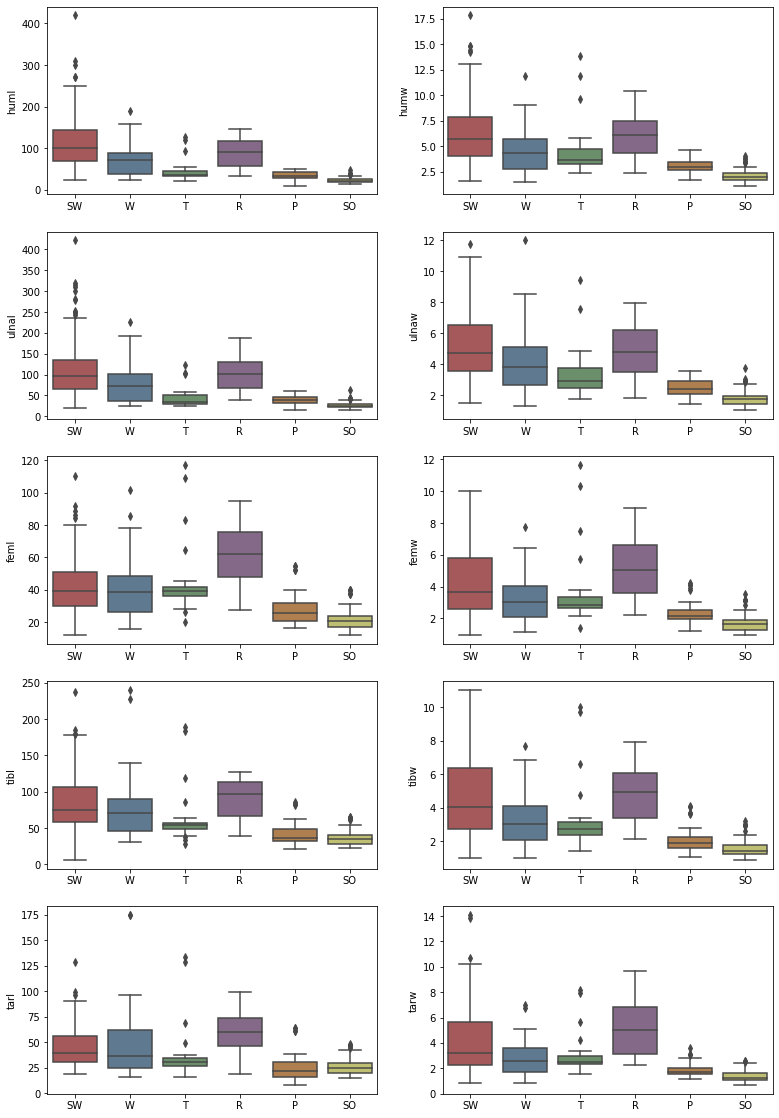

In [12]:
_, axes = plt.subplots(nrows=5, ncols=2, figsize=(13, 20))

for f, ax in zip(columns, axes.ravel()):
    _ = sns.boxplot(
        data=birds, 
        y=f, 
        x='type', 
        ax=ax, 
        palette=sns.color_palette("Set1", n_colors=6, desat=.5)
    )
    
    ax.set_xlabel("")